In [32]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = test[["PassengerId","Pclass","Sex","Age","SibSp","Fare","Embarked"]]


In [5]:
train = train[["Survived","PassengerId","Pclass","Sex","Age","SibSp","Fare","Embarked"]]

In [6]:
train.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,1,3,male,22.0,1,7.2500,S
1,1,2,1,female,38.0,1,71.2833,C
2,1,3,3,female,26.0,0,7.9250,S
3,1,4,1,female,35.0,1,53.1000,S
4,0,5,3,male,35.0,0,8.0500,S


In [7]:
ohesex = pd.get_dummies(train['Sex'],drop_first=True)
train.drop('Sex',axis=1,inplace=True)
train = train.join(ohesex)
train.head()

,Survived,PassengerId,Pclass,Age,SibSp,Fare,Embarked,male
0,0,1,3,22.0,1,7.2500,S,1
1,1,2,1,38.0,1,71.2833,C,0
2,1,3,3,26.0,0,7.9250,S,0
3,1,4,1,35.0,1,53.1000,S,0
4,0,5,3,35.0,0,8.0500,S,1


In [8]:
ohesext = pd.get_dummies(test['Sex'],drop_first=True)
test.drop('Sex',axis=1,inplace=True)
test = test.join(ohesext)
test.head()

,PassengerId,Pclass,Age,SibSp,Fare,Embarked,male
0,892,3,34.5,0,7.8292,Q,1
1,893,3,47.0,1,7.0000,S,0
2,894,2,62.0,0,9.6875,Q,1
3,895,3,27.0,0,8.6625,S,1
4,896,3,22.0,1,12.2875,S,0


In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
oheembarked = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop('Embarked',axis=1,inplace=True)
train = train.join(oheembarked)
train.head()

,Survived,PassengerId,Pclass,Age,SibSp,Fare,male,Q,S
0,0,1,3,22.0,1,7.2500,1,0,1
1,1,2,1,38.0,1,71.2833,0,0,0
2,1,3,3,26.0,0,7.9250,0,0,1
3,1,4,1,35.0,1,53.1000,0,0,1
4,0,5,3,35.0,0,8.0500,1,0,1


In [11]:
oheembarkedt = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop('Embarked',axis=1,inplace=True)
test = test.join(oheembarkedt)
test.head()

,PassengerId,Pclass,Age,SibSp,Fare,male,Q,S
0,892,3,34.5,0,7.8292,1,1,0
1,893,3,47.0,1,7.0000,0,0,1
2,894,2,62.0,0,9.6875,1,1,0
3,895,3,27.0,0,8.6625,1,0,1
4,896,3,22.0,1,12.2875,0,0,1


In [12]:
train.isnull().values.any()

True

In [13]:
train.columns[train.isna().any()].tolist()

['Age']

In [14]:
train["Age"].mean()

29.69911764705882

In [15]:
train['Age'].fillna(train["Age"].mean(), inplace=True)

In [16]:
train.columns[train.isna().any()].tolist()

[]

In [17]:
test['Age'].fillna(test["Age"].mean(), inplace=True)

In [18]:
test.columns[test.isna().any()].tolist()

['Fare']

In [19]:
test['Fare'].fillna(test["Fare"].mean(), inplace=True)

In [20]:
test.columns[test.isna().any()].tolist()

[]

In [21]:
X_train =train.iloc[:, train.columns != 'Survived']
Y_train =train.loc[:, 'Survived']
X_test =test.iloc[:, test.columns != 'Survived']
Y_test=[]

In [22]:
X_train

,PassengerId,Pclass,Age,SibSp,Fare,male,Q,S
0,1,3,22.000000,1,7.2500,1,0,1
1,2,1,38.000000,1,71.2833,0,0,0
2,3,3,26.000000,0,7.9250,0,0,1
3,4,1,35.000000,1,53.1000,0,0,1
4,5,3,35.000000,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,13.0000,1,0,1
887,888,1,19.000000,0,30.0000,0,0,1
888,889,3,29.699118,1,23.4500,0,0,1
889,890,1,26.000000,0,30.0000,1,0,0


## Arquitectura 1

In [34]:
#Primer Red Neural
clasificador = Sequential()
clasificador.add(Dense(input_dim = 8, units=6, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train,Y_train, batch_size=10,epochs=100)

Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6768 - accuracy: 0.6150
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6162
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6162
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6162
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6162
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.6162
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.6162
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6364
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6734
Epoch 10/100
90/90 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.6813
Epoch 11/

90/90 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7856
Epoch 84/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7991
Epoch 85/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.7912
Epoch 86/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.7845
Epoch 87/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7879
Epoch 88/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8002
Epoch 89/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7957
Epoch 90/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7912
Epoch 91/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7912
Epoch 92/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.7957
Epoch 93/100


In [35]:
##Guardar el modelo
clasificador.save('8_6_sig_out.h5')

#Cargamos la red
new_model=keras.models.load_model('8_6_sig_out.h5' )

In [52]:
#predicciones
Y_preds= new_model.predict(X_test)
Y_preds

array([[0.05251551],
       [0.07421696],
       [0.03844813],
       [0.04825106],
       [0.27469325],
       [0.06690902],
       [0.2969337 ],
       [0.13024944],
       [0.35222688],
       [0.08574995],
       [0.04237396],
       [0.1304644 ],
       [0.9104537 ],
       [0.05695397],
       [0.7894806 ],
       [0.60537136],
       [0.08117458],
       [0.05912611],
       [0.12322438],
       [0.10697794],
       [0.20777875],
       [0.05234903],
       [0.73691934],
       [0.6591455 ],
       [0.8815286 ],
       [0.03152815],
       [0.93889695],
       [0.05628067],
       [0.1771197 ],
       [0.07284665],
       [0.07467034],
       [0.11752439],
       [0.28312033],
       [0.33230644],
       [0.3982535 ],
       [0.06097174],
       [0.15076306],
       [0.25255793],
       [0.05025721],
       [0.25156045],
       [0.05333066],
       [0.20462084],
       [0.03129485],
       [0.3997686 ],
       [0.7243127 ],
       [0.04551739],
       [0.18136287],
       [0.053

In [53]:
Y_preds = Y_preds.round()
Y_preds

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [54]:
pred1 = pd.DataFrame(Y_preds, 
             columns=['Survived'])

In [57]:
Clasificador1 =pd.concat([test.loc[:, 'PassengerId'], pred1], axis=1, ignore_index=False)

In [61]:
Clasificador1 = Clasificador1.astype(int)
Clasificador1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
Clasificador1.to_csv('Clasificador1.csv', index=False)

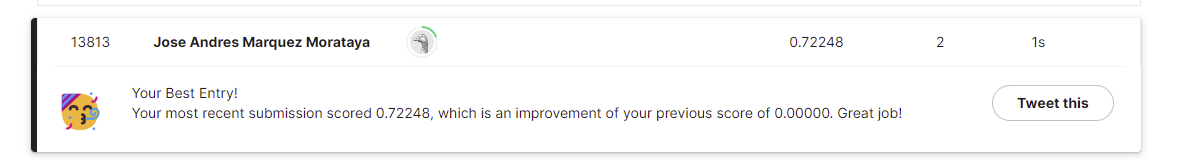

## Arquitectura 2

In [63]:
#Segunda Red Neural
clasificador = Sequential()
clasificador.add(Dense(input_dim = 8, units=4, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train,Y_train, batch_size=5,epochs=150)

Epoch 1/150
179/179 [==============================] - 1s 2ms/step - loss: 0.6800 - accuracy: 0.6117
Epoch 2/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6319
Epoch 3/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6566
Epoch 4/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6554
Epoch 5/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6745
Epoch 6/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6723
Epoch 7/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6790: 0s - loss: 0.5985 - accuracy: 0.
Epoch 8/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6801
Epoch 9/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6723
Epoch 10/150
179/179 [==============================] - 0

179/179 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7856
Epoch 81/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7834
Epoch 82/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7901
Epoch 83/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7912
Epoch 84/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8047
Epoch 85/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7946
Epoch 86/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7991
Epoch 87/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7957
Epoch 88/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7924
Epoch 89/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 

In [64]:
##Guardar el modelo
clasificador.save('8_4_sig_out.h5')

#Cargamos la red
new_model=keras.models.load_model('8_4_sig_out.h5' )

In [65]:
#predicciones
Y_preds= new_model.predict(X_test)
Y_preds

array([[0.06016704],
       [0.20487851],
       [0.04921636],
       [0.06584352],
       [0.3712827 ],
       [0.12535858],
       [0.5947895 ],
       [0.100373  ],
       [0.57003695],
       [0.05928105],
       [0.05438694],
       [0.14731735],
       [0.9452963 ],
       [0.02984157],
       [0.92755395],
       [0.72806716],
       [0.097379  ],
       [0.09401473],
       [0.29548126],
       [0.41878003],
       [0.3051302 ],
       [0.13425022],
       [0.89893526],
       [0.69327915],
       [0.96262836],
       [0.01845035],
       [0.94944227],
       [0.08669403],
       [0.19448951],
       [0.03807002],
       [0.03922158],
       [0.07782066],
       [0.410685  ],
       [0.46179283],
       [0.4122866 ],
       [0.10454282],
       [0.4583687 ],
       [0.517892  ],
       [0.07226762],
       [0.2714904 ],
       [0.0505749 ],
       [0.19947138],
       [0.03448153],
       [0.658519  ],
       [0.8945759 ],
       [0.06888309],
       [0.20473373],
       [0.068

In [66]:
Y_preds = Y_preds.round()
Y_preds

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [67]:
pred2 = pd.DataFrame(Y_preds, 
             columns=['Survived'])
Clasificador2 =pd.concat([test.loc[:, 'PassengerId'], pred2], axis=1, ignore_index=False)
Clasificador2 = Clasificador2.astype(int)
Clasificador2
Clasificador2.to_csv('Clasificador2.csv', index=False)

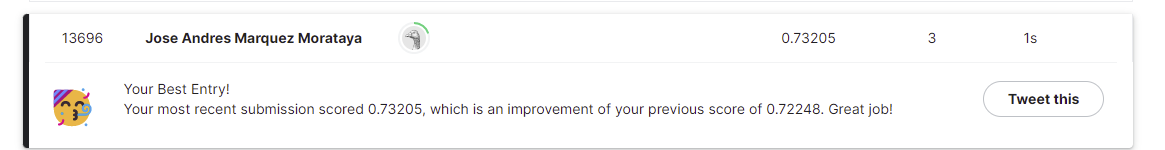

## Arquitectura 3

In [69]:
#Tercera Red Neural
clasificador = Sequential()
clasificador.add(Dense(input_dim = 8, units=3, activation='softmax', kernel_initializer='uniform'))
clasificador.add(Dense(units=4, activation='softmax', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='softmax', kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train,Y_train, batch_size=5,epochs=150)

Epoch 1/150
179/179 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.3838
Epoch 2/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.3838
Epoch 3/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.3838
Epoch 4/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.3838
Epoch 5/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.3838TA: 0s - loss: 0.6580 - accu
Epoch 6/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.3838
Epoch 7/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.3838
Epoch 8/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.3838
Epoch 9/150
179/179 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.3838
Epoch 10/150
179/179 [==============================] - 0s 2ms/

179/179 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.3838
Epoch 81/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.3838
Epoch 82/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.3838
Epoch 83/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.3838
Epoch 84/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.3838
Epoch 85/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.3838
Epoch 86/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.3838
Epoch 87/150
179/179 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.3838
Epoch 88/150
179/179 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.3838
Epoch 89/150
179/179 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 

In [70]:
##Guardar el modelo
clasificador.save('8_3_softmax_out.h5')

#Cargamos la red
new_model=keras.models.load_model('8_3_softmax_out.h5' )

In [71]:
#predicciones
Y_preds= new_model.predict(X_test)
Y_preds

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [72]:
Y_preds = Y_preds.round()
Y_preds

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [73]:
pred3 = pd.DataFrame(Y_preds, 
             columns=['Survived'])
Clasificador3 =pd.concat([test.loc[:, 'PassengerId'], pred3], axis=1, ignore_index=False)
Clasificador3 = Clasificador3.astype(int)
Clasificador3
Clasificador3.to_csv('Clasificador3.csv', index=False)

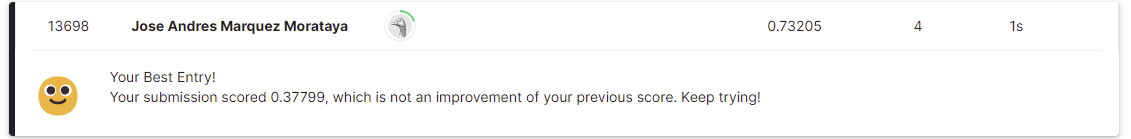

## Arquitectura 4

In [81]:
#Cuarta Red Neural
clasificador = Sequential()
clasificador.add(Dense(input_dim = 8, units=4, activation='sigmoid', kernel_initializer='uniform'))
clasificador.add(Dense(units=4, activation='sigmoid', kernel_initializer='uniform'))
clasificador.add(Dense(units=4, activation='sigmoid', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train,Y_train, batch_size=15,epochs=100)

Epoch 1/100
60/60 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.6027
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6162
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6162
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6162
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6162
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6162
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6162
Epoch 8/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6162
Epoch 9/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6162
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6162
Epoch 11/

60/60 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7811
Epoch 83/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7767
Epoch 84/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5232 - accuracy: 0.7823
Epoch 85/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7845
Epoch 86/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5166 - accuracy: 0.7935
Epoch 87/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.7935
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7666
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7946
Epoch 90/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7924
Epoch 91/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7868
Epoch 92/100


In [82]:
##Guardar el modelo
clasificador.save('8_4_4_sigmoid_out.h5')

#Cargamos la red
new_model=keras.models.load_model('8_4_4_sigmoid_out.h5' )

In [83]:
#predicciones
Y_preds= new_model.predict(X_test)
Y_preds

array([[0.135963  ],
       [0.14652818],
       [0.13508517],
       [0.1349467 ],
       [0.28422785],
       [0.13567993],
       [0.36816186],
       [0.16303316],
       [0.34903225],
       [0.1390391 ],
       [0.13482869],
       [0.1377998 ],
       [0.64502466],
       [0.13486469],
       [0.6406908 ],
       [0.6359517 ],
       [0.13689792],
       [0.13521904],
       [0.1980061 ],
       [0.18851823],
       [0.40773398],
       [0.13499948],
       [0.64571697],
       [0.5365598 ],
       [0.6506322 ],
       [0.13443914],
       [0.64909744],
       [0.13517427],
       [0.15333551],
       [0.1359097 ],
       [0.1356678 ],
       [0.19807833],
       [0.39574757],
       [0.55205363],
       [0.41923016],
       [0.13536772],
       [0.26880896],
       [0.33802688],
       [0.13514137],
       [0.53768134],
       [0.13532913],
       [0.14656943],
       [0.13471341],
       [0.3429343 ],
       [0.63964796],
       [0.13498694],
       [0.14927405],
       [0.136

In [84]:
Y_preds = Y_preds.round()
Y_preds

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [86]:
pred4 = pd.DataFrame(Y_preds, 
             columns=['Survived'])
Clasificador4 =pd.concat([test.loc[:, 'PassengerId'], pred4], axis=1, ignore_index=False)
Clasificador4 = Clasificador4.astype(int)
Clasificador4
Clasificador4.to_csv('Clasificador4.csv', index=False)

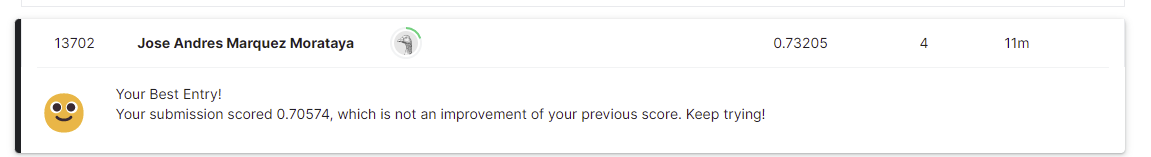

## Arquitectura 5

In [88]:
#Quinta Red Neural
clasificador = Sequential()
clasificador.add(Dense(input_dim = 8, units=4, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=3, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train,Y_train, batch_size=10,epochs=250)

Epoch 1/250
90/90 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.6162
Epoch 2/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6162
Epoch 3/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6162
Epoch 4/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6162
Epoch 5/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6162
Epoch 6/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6229
Epoch 7/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6521
Epoch 8/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6712
Epoch 9/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.6768
Epoch 10/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6734
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.8002
Epoch 84/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7969
Epoch 85/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7879
Epoch 86/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8002
Epoch 87/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7789
Epoch 88/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7901
Epoch 89/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7856
Epoch 90/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8013
Epoch 91/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7912
Epoch 92/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8025
Epoch 93/250


90/90 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7935
Epoch 165/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7912
Epoch 166/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8025
Epoch 167/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7946
Epoch 168/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7935
Epoch 169/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8013
Epoch 170/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8013
Epoch 171/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7924
Epoch 172/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.7991
Epoch 173/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7856
Epoc

90/90 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8114
Epoch 246/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8036
Epoch 247/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8058
Epoch 248/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8092
Epoch 249/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8047
Epoch 250/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8058


In [89]:
##Guardar el modelo
clasificador.save('8_4_3_relu_out.h5')

#Cargamos la red
new_model=keras.models.load_model('8_4_3_relu_out.h5' )

In [90]:
#predicciones
Y_preds= new_model.predict(X_test)
Y_preds

array([[0.10464913],
       [0.21543461],
       [0.07011461],
       [0.12408605],
       [0.61495394],
       [0.24422777],
       [0.7284993 ],
       [0.3321951 ],
       [0.714469  ],
       [0.20576769],
       [0.10603756],
       [0.41276556],
       [0.9611709 ],
       [0.10190627],
       [0.95639896],
       [0.898746  ],
       [0.16232932],
       [0.16063634],
       [0.40108216],
       [0.47557315],
       [0.41404438],
       [0.21230352],
       [0.9612763 ],
       [0.75637406],
       [0.9772339 ],
       [0.0517838 ],
       [0.96465397],
       [0.1505869 ],
       [0.46012887],
       [0.13549134],
       [0.1292471 ],
       [0.25630125],
       [0.72194356],
       [0.7425192 ],
       [0.5070323 ],
       [0.18791837],
       [0.5666035 ],
       [0.67062396],
       [0.1386042 ],
       [0.38489303],
       [0.10798484],
       [0.4859169 ],
       [0.06992087],
       [0.8769751 ],
       [0.9513799 ],
       [0.12927303],
       [0.49358383],
       [0.122

In [91]:
Y_preds = Y_preds.round()
Y_preds

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [92]:
pred5 = pd.DataFrame(Y_preds, 
             columns=['Survived'])
Clasificador5 =pd.concat([test.loc[:, 'PassengerId'], pred5], axis=1, ignore_index=False)
Clasificador5 = Clasificador5.astype(int)
Clasificador5
Clasificador5.to_csv('Clasificador5.csv', index=False)

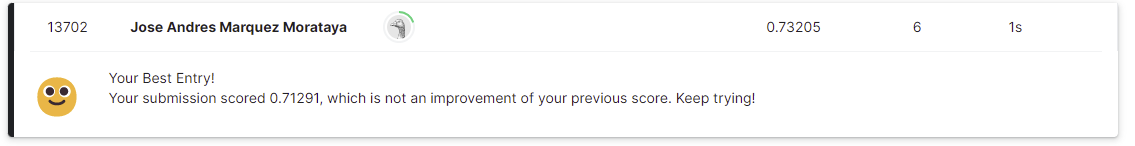

#Conclusion  La mejor arquitectura fue la numero 2, el cual se utilizo Una funcion de activaccion Relu, y 2 capa oculta, ambas con 4 unidades, y con el optimizador de Adam, dando un accuracy de  0.7980 al finalizar la ultima iteracion. Por tal razon es la seleccionada